In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [20]:
with open("lists/rnaprot.list") as f_tr:
    names = f_tr.read().splitlines()
a=[]
n=[]
for name in names:
    try:
        b=name.split("_")[0]+'_'+name.split('_')[1]
        x=np.load('rnaprot_dataset/raw/'+b+'_atomtypes.npy')
        a.append(x.shape[0])
        n.append(name)
    except:
        print('Missing: '+b)
a=np.array(a)
names=np.array(n)



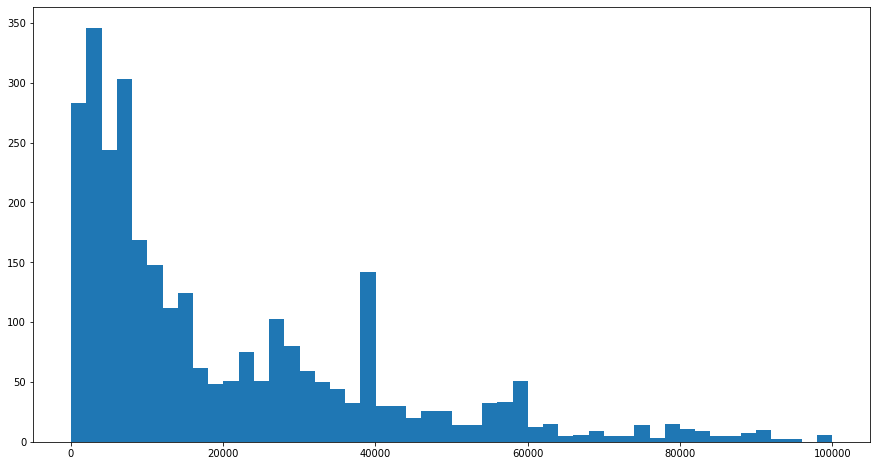

In [21]:
fig=plt.figure(figsize=(15,8))
plt.hist(a, bins=50)
plt.show()

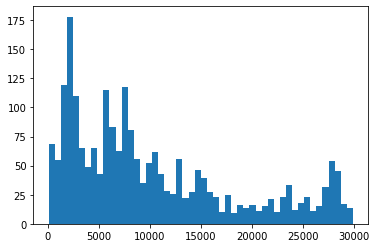

In [22]:
b=a[a<=30000]
plt.hist(b, bins=50)
plt.show()

In [23]:
len(b)

2199

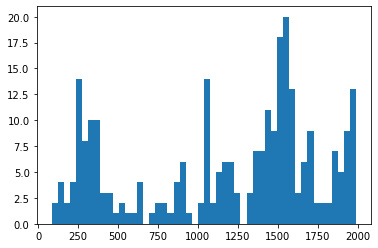

In [24]:
plt.hist(a[a<2000], bins=50)
plt.show()

In [25]:
b=a[a>250]
b=b[b<30000]
len(b)

2185

In [26]:
names=names[(a>250) & (a<30000)]

In [27]:
with open("lists/rnaprot_filtered.list", 'w') as f_tr:
    f_tr.write('\n'.join(list(names)))
    f_tr.write('\n')

In [2]:
with open("lists/rnaprot_filtered.list", 'r') as f_tr:
    names = f_tr.read().splitlines()
a=[]
for name in names:
    b=name.split("_")[0]+'_'+name.split('_')[1]
    x=np.load('rnaprot_dataset/raw/'+b+'_atomtypes.npy')
    a.append(x.shape[0])
a=np.array(a)
names=np.array(names)

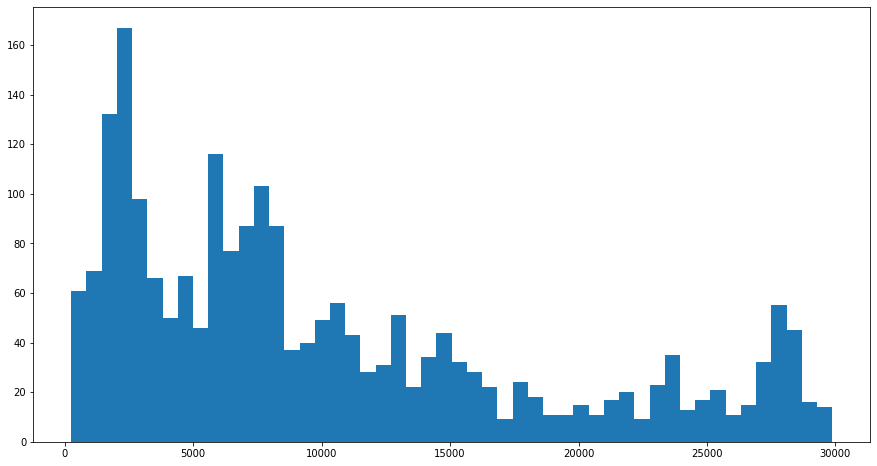

In [3]:
fig=plt.figure(figsize=(15,8))
plt.hist(a, bins=50)
plt.show()

In [95]:
import torch
dataset=torch.load('rnaprot_dataset/processed/npi/training_rna.pt')

In [96]:
a=np.array(dataset[0].gen_labels_p1)
length=a.shape[0]

/home/domain/data/prog/miniconda3/envs/dmasif/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


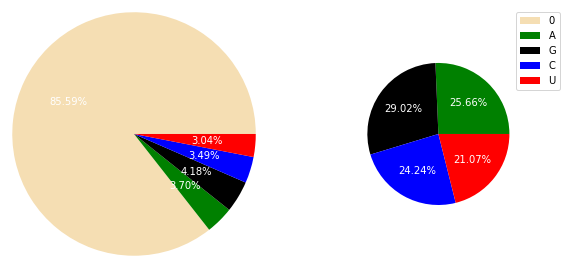

In [97]:
fig,ax=plt.subplots(1,2, figsize=(10,10))
ax[0].pie(np.sum(a[:,None]==np.array([0,1,2,3,4])[None,:],axis=0), 
          colors=['wheat','green','black','blue','red'],
          autopct=lambda x: f'{x:.2f}%',
          labels=['0','A','G','C','U'], radius=1.2, 
          textprops={'fontsize':10, 'color': 'white'})
ax[1].pie(np.sum(a[:,None]==np.array([5,1,2,3,4])[None,:],axis=0), 
          colors=['wheat','green','black','blue','red'],
          autopct=lambda x: f'{x:.2f}%'if x>0 else '',
          labels=['0','A','G','C','U'], radius=0.7, 
          textprops={'fontsize':10, 'color': 'white'})
ax[1].legend()
fig.show()

In [58]:
import json
with open('lists/rnaprot_polymer_info.json', 'r') as f:
    polymer_info=json.load(f)

In [59]:
import collections

pfam_info = collections.defaultdict(list)

for n in polymer_info:
    for k in polymer_info[n]:
        pfam_info[k].append(n)
        
pfam_info

defaultdict(list,
            {'PF09401': ['7n0b', '7n0c', '7l6r', '7l6t'],
             'PF06471': ['7n0b', '7n0c'],
             'PF00973': ['7ewq',
              '7oi3',
              '6jc3',
              '6h5q',
              '6h5s',
              '4uft',
              '6m7d'],
             'PF04565': ['7ol0',
              '7oky',
              '7okx',
              '7mko',
              '7mkn',
              '7eh0',
              '7du2',
              '7dn3',
              '7aoe',
              '7ked',
              '7kee',
              '7kef',
              '6xll',
              '6xln',
              '6xlm',
              '6x4y',
              '6x4w',
              '6x50',
              '6x43',
              '6x2n',
              '6x26',
              '6x2f',
              '6wvj',
              '6wox',
              '6woy',
              '6wmp',
              '6m6c',
              '6l74',
              '6uq1',
              '6uq3',
              '6upz',
              '6uq2',
 

In [60]:
pfam_list=list(pfam_info.keys())
pfam_list.sort(key=lambda x: len(list(set(pfam_info[x]))), reverse=True)
pfam_len=[len(list(set(pfam_info[x]))) for x in pfam_list]

<BarContainer object of 50 artists>

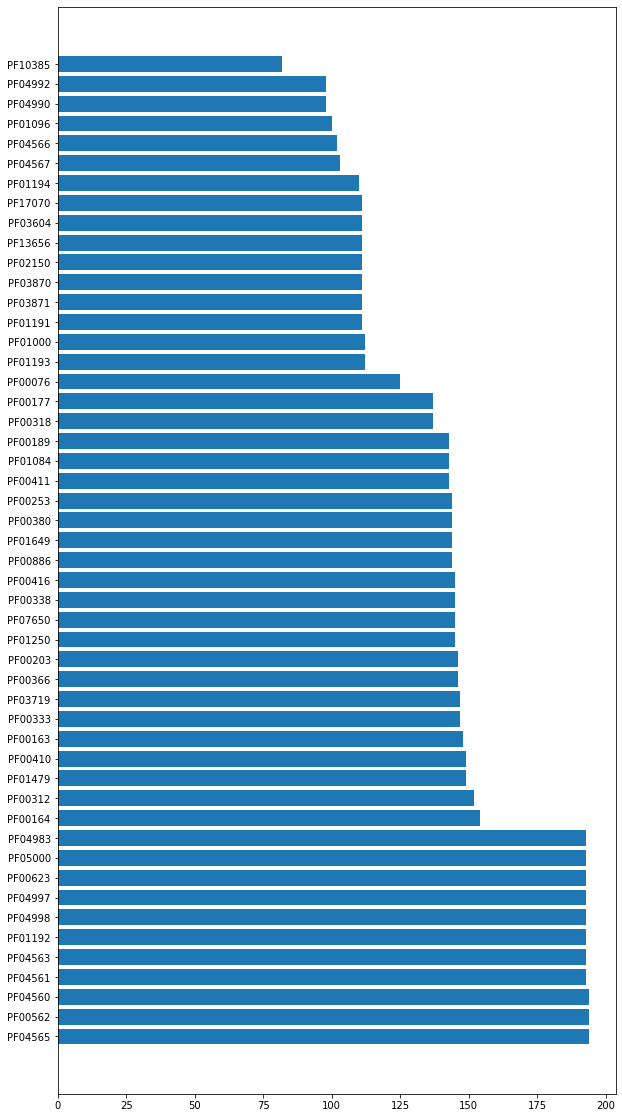

In [61]:
plt.figure(figsize=(10,20))
plt.barh(pfam_list[:50], pfam_len[:50])

In [62]:
pfam_list=np.array(pfam_list)
pfam_len=np.array(pfam_len)
ones=pfam_list[np.where(pfam_len==1)]

In [63]:
len(ones)

179

In [67]:
polymer_ones=[pfam_info[x][0] for x in ones if len(set(polymer_info[pfam_info[x][0]]))==1]
polymer_ones

['6is0',
 '5w3v',
 '5u9b',
 '5hsw',
 '4ycp',
 '4gg4',
 '3qjp',
 '2xc7',
 '2nre',
 '7kjt',
 '6yym',
 '6m6v',
 '6i2n',
 '6m7k',
 '6e0o',
 '5zw4',
 '6cf2',
 '5tc1',
 '5sze',
 '4m4o',
 '4ii9',
 '3t5n',
 '3s4g',
 '3am1',
 '3moj',
 '2pjp',
 '2gje']

In [68]:
len(polymer_ones)

27